## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<hr>

## Site A (2019, 2020, 2021)

In [2]:
X_A_2019 = np.load('/kaggle/input/data-usa/Site_A/x-2019.npy')
X_A_2020 = np.load('/kaggle/input/data-usa/Site_A/x-2020.npy')
X_A_2021 = np.load('/kaggle/input/data-usa/Site_A/x-2021.npy')

print('Shape of X (Site A - 2019):', X_A_2019.shape)
print('Shape of X (Site A - 2020):', X_A_2020.shape)
print('Shape of X (Site A - 2021):', X_A_2021.shape)

SiteA_data = [
    ("2019", X_A_2019),
    ("2020", X_A_2020),
    ("2021", X_A_2021)
]

Shape of X (Site A - 2019): (2235904, 28, 6)
Shape of X (Site A - 2020): (2249845, 28, 6)
Shape of X (Site A - 2021): (2180602, 28, 6)


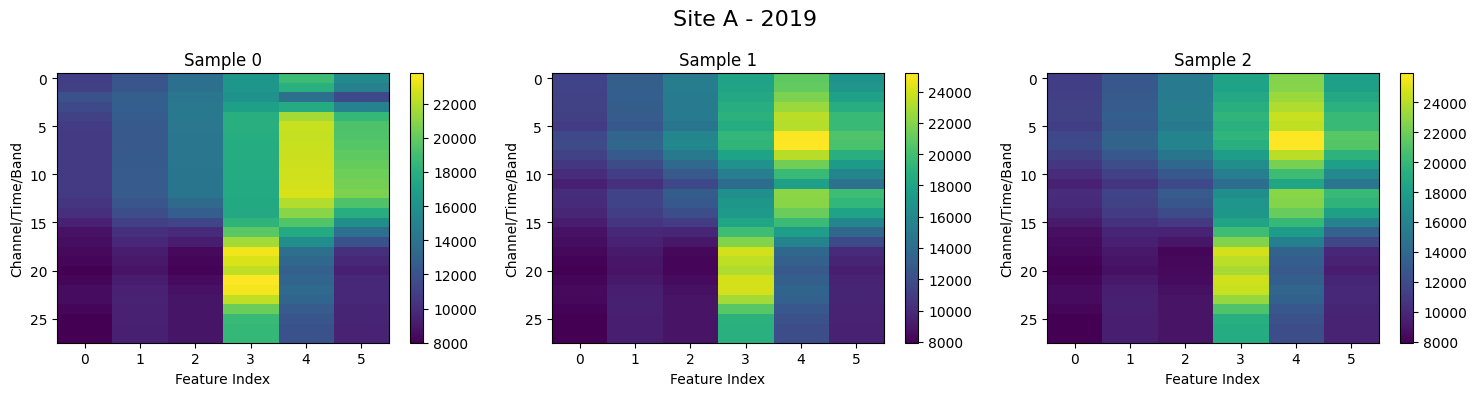

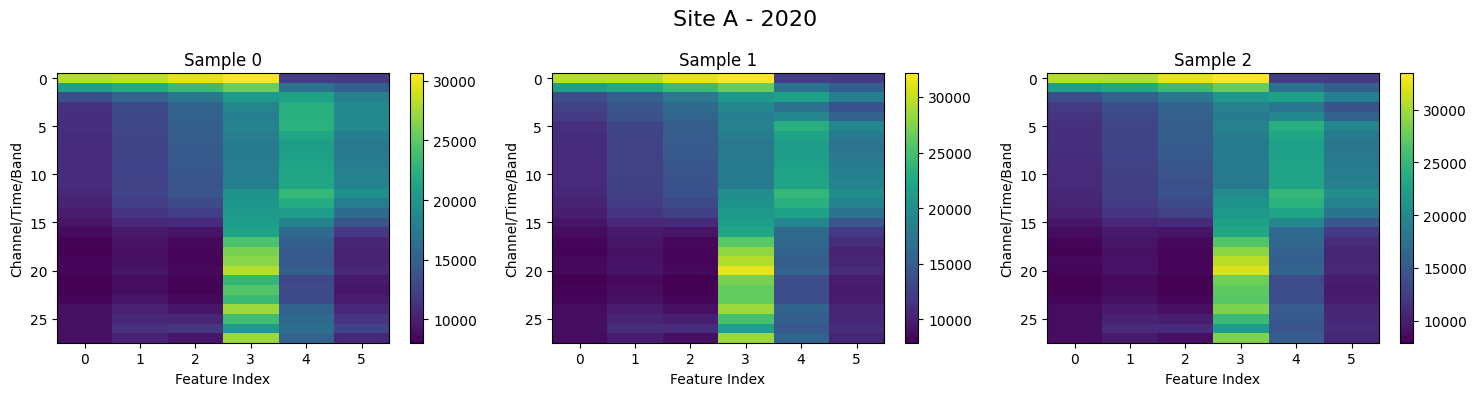

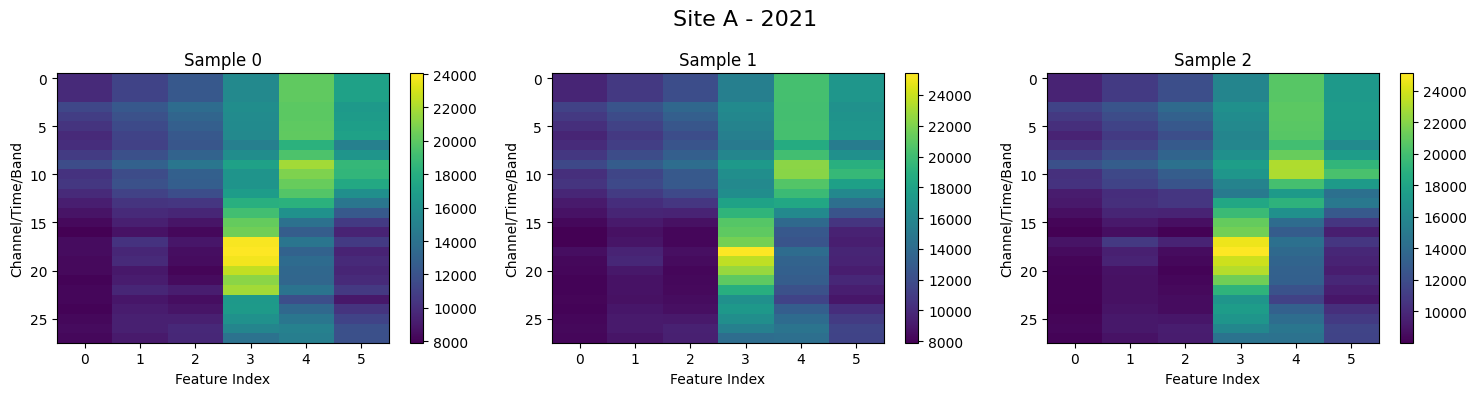

In [3]:
# Ploting the preprocessed feature maps for all three years of Site A
for year, X_data in SiteA_data:
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    for i in range(3):
        im = axes[i].imshow(X_data[i], aspect='auto', cmap='viridis')
        axes[i].set_title(f"Sample {i}")
        axes[i].set_xlabel("Feature Index")
        axes[i].set_ylabel("Channel/Time/Band")
        fig.colorbar(im, ax=axes[i], orientation='vertical')

    fig.suptitle(f"Site A - {year}", fontsize=16)
    plt.tight_layout()
    plt.show()

-> Input distribution changes slightly across the years in Site A. 

In [4]:
for year, X_data in SiteA_data:
    print(f'\n\n======= For Site A - {year} =======')
    feature_means = X_data.mean(axis=(0, 1))  # average over samples and features
    feature_stds = X_data.std(axis=(0, 1))
    
    for i, (m, s) in enumerate(zip(feature_means, feature_stds)):
        print(f"Feature {i}: Mean = {m:.4f}, Std = {s:.4f}")
    
    # Compute overall mean and std
    mean = X_data.mean()
    std = X_data.std()
    
    print(f"\nGlobal Mean: {mean:.4f}")
    print(f"Global Std Dev: {std:.4f}")



======= For Site A - 2019 =======
Feature 0: Mean = 9125.7839, Std = 954.7112
Feature 1: Mean = 10072.9565, Std = 1117.6790
Feature 2: Mean = 10259.7823, Std = 1830.2272
Feature 3: Mean = 18465.9805, Std = 4748.0298
Feature 4: Mean = 16455.6007, Std = 3182.5979
Feature 5: Mean = 13576.9940, Std = 3438.3280

Global Mean: 12992.8496
Global Std Dev: 4532.1424


======= For Site A - 2020 =======
Feature 0: Mean = 9234.2181, Std = 1619.8221
Feature 1: Mean = 10326.2330, Std = 1694.5932
Feature 2: Mean = 10523.3406, Std = 2207.3945
Feature 3: Mean = 18191.7934, Std = 4121.2513
Feature 4: Mean = 15938.4485, Std = 2887.7106
Feature 5: Mean = 13173.9971, Std = 3119.2401

Global Mean: 12898.0051
Global Std Dev: 4251.3203


======= For Site A - 2021 =======
Feature 0: Mean = 9093.7592, Std = 991.5984
Feature 1: Mean = 10028.7181, Std = 1058.0928
Feature 2: Mean = 10160.7064, Std = 1645.5716
Feature 3: Mean = 18063.6845, Std = 4265.7397
Feature 4: Mean = 16403.5554, Std = 3107.1430
Feature 5: Me

-> Clearly, the values are not normalized and are at different scales across years.

<hr>

In [5]:
y_A_2019 = np.load('/kaggle/input/data-usa/Site_A/y-2019.npy')
y_A_2020 = np.load('/kaggle/input/data-usa/Site_A/y-2020.npy')
y_A_2021 = np.load('/kaggle/input/data-usa/Site_A/y-2021.npy')

print('Shape of y (Site A - 2019):', y_A_2019.shape)
print('Shape of y (Site A - 2020):', y_A_2020.shape)
print('Shape of y (Site A - 2021):', y_A_2021.shape)

SiteA_labels = [
    ("2019", y_A_2019),
    ("2020", y_A_2020),
    ("2021", y_A_2021)

]

Shape of y (Site A - 2019): (2235904,)
Shape of y (Site A - 2020): (2249845,)
Shape of y (Site A - 2021): (2180602,)


In [6]:
for year, y_label in SiteA_labels:
    unique_labels, counts = np.unique(y_label, return_counts=True)
    total = counts.sum()
    print(f'\n\n ====== Site A - {year} ======')
    print(f"{'Label':<10}{'Count':<10}{'Percentage':<10}")
    print("-" * 30)
    for label, count in zip(unique_labels, counts):
        percentage = (count / total) * 100
        print(f"{label:<10}{count:<10}{percentage:<.2f}%")
    
    print(f"\nTotal samples: {total}")



 ====== Site A - 2019 ======
Label     Count     Percentage
------------------------------
0         391359    17.50%
1         1218750   54.51%
2         625795    27.99%

Total samples: 2235904


 ====== Site A - 2020 ======
Label     Count     Percentage
------------------------------
0         368245    16.37%
1         1253893   55.73%
2         627707    27.90%

Total samples: 2249845


 ====== Site A - 2021 ======
Label     Count     Percentage
------------------------------
0         374504    17.17%
1         1103460   50.60%
2         702638    32.22%

Total samples: 2180602


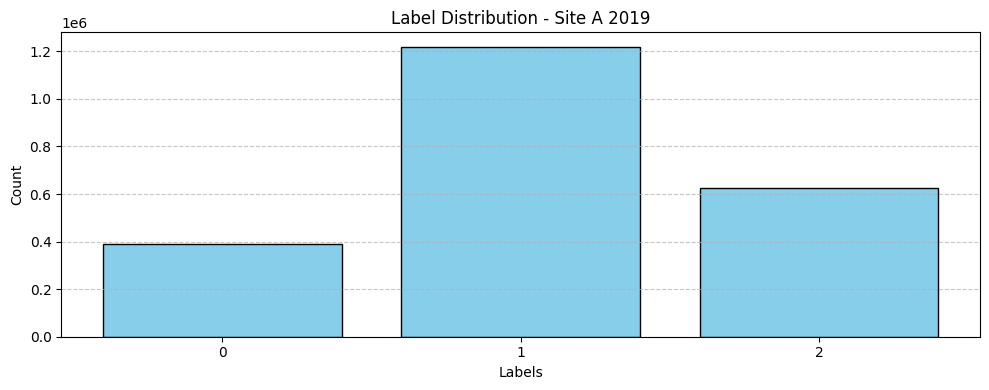

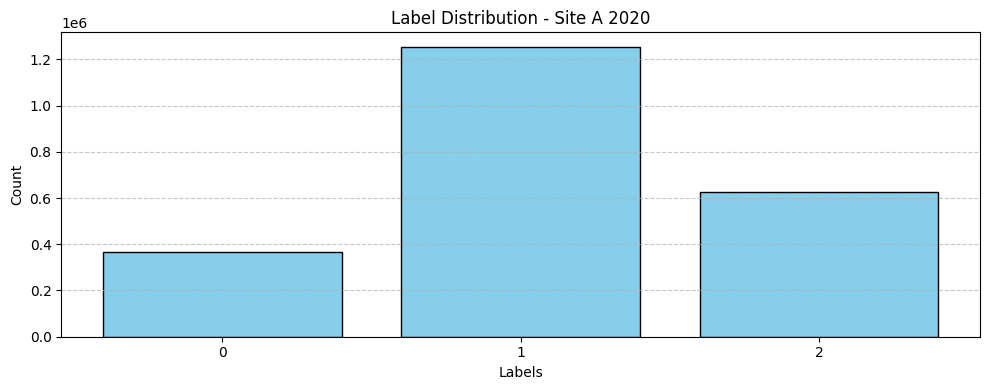

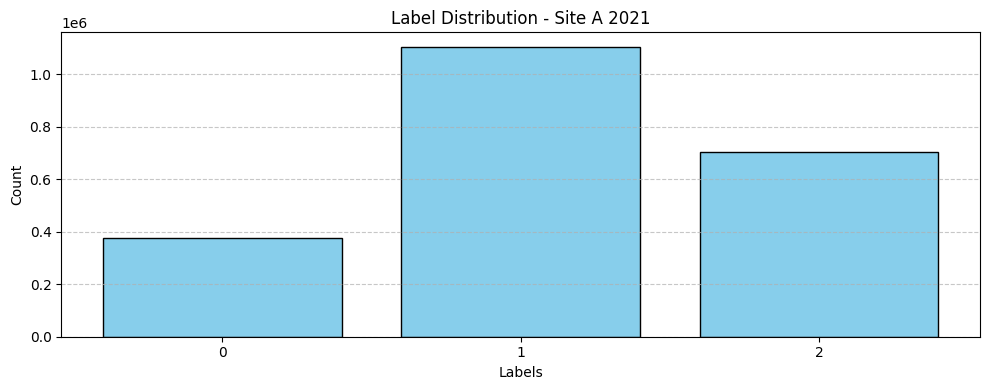

In [7]:
# Plot histogram
for year, y_label in SiteA_labels:
    unique_labels, counts = np.unique(y_label, return_counts=True)

    plt.figure(figsize=(10, 4))
    plt.bar(unique_labels.astype(str), counts, color='skyblue', edgecolor='black')
    plt.xlabel("Labels")
    plt.ylabel("Count")
    plt.title(f"Label Distribution - Site A {year}")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

-> Label distribution almost the same across years in Site A.

<hr>

## Site B (2019, 2020, 2021)

In [8]:
X_B_2019 = np.load('/kaggle/input/data-usa/Site_B/x-2019.npy')
X_B_2020 = np.load('/kaggle/input/data-usa/Site_B/x-2020.npy')
X_B_2021 = np.load('/kaggle/input/data-usa/Site_B/x-2021.npy')

print('Shape of X (Site B - 2019):', X_B_2019.shape)
print('Shape of X (Site B - 2020):', X_B_2020.shape)
print('Shape of X (Site B - 2021):', X_B_2021.shape)

SiteB_data = [
    ("2019", X_B_2019),
    ("2020", X_B_2020),
    ("2021", X_B_2021)
]

Shape of X (Site B - 2019): (2069809, 28, 6)
Shape of X (Site B - 2020): (1943716, 28, 6)
Shape of X (Site B - 2021): (2241038, 28, 6)


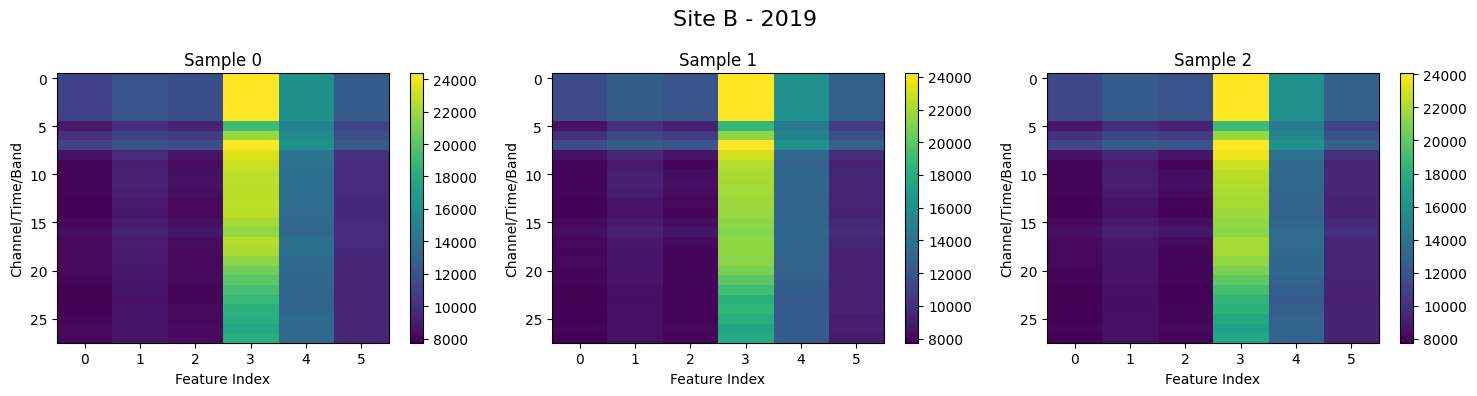

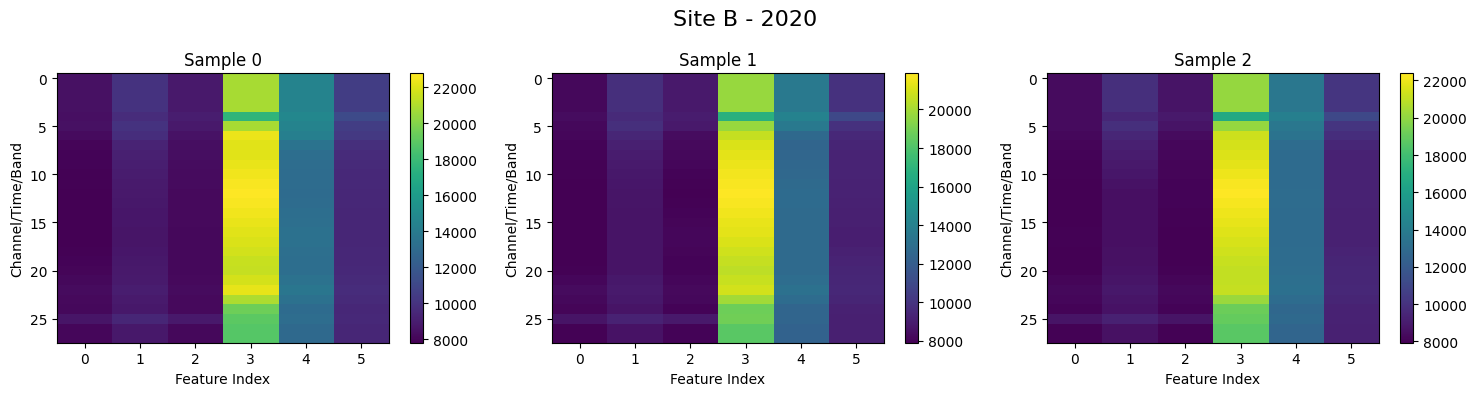

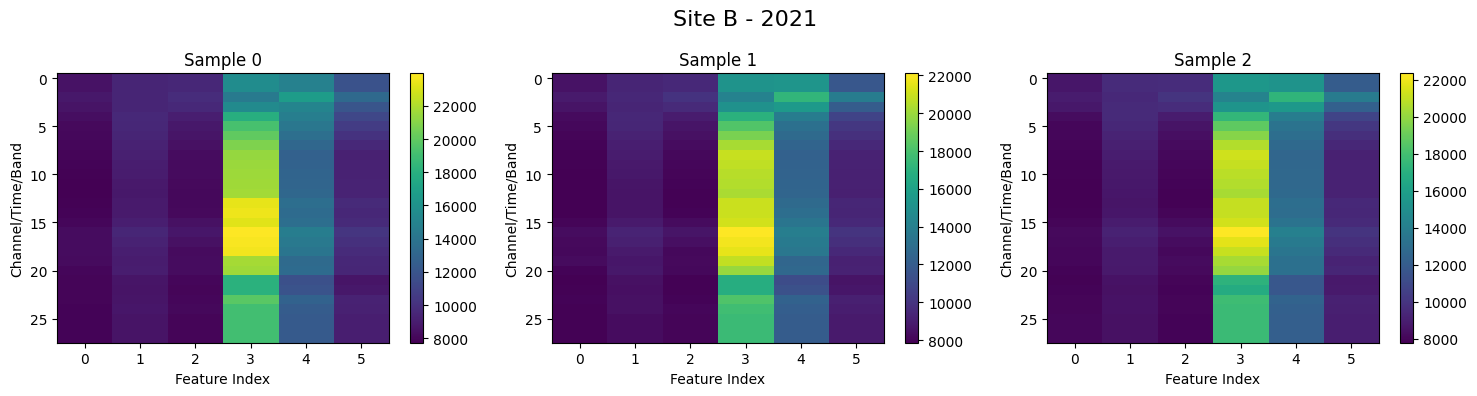

In [9]:
# Ploting the preprocessed feature maps for all three years of Site B
for year, X_data in SiteB_data:
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    for i in range(3):
        im = axes[i].imshow(X_data[i], aspect='auto', cmap='viridis')
        axes[i].set_title(f"Sample {i}")
        axes[i].set_xlabel("Feature Index")
        axes[i].set_ylabel("Channel/Time/Band")
        fig.colorbar(im, ax=axes[i], orientation='vertical')

    fig.suptitle(f"Site B - {year}", fontsize=16)
    plt.tight_layout()
    plt.show()

-> Input distribution slightly changes across the years in Site B but differs very much from Site A.

In [10]:
for year, X_data in SiteB_data:
    print(f'\n\n======= For Site B - {year} =======')
    feature_means = X_data.mean(axis=(0, 1))  # average over samples and features
    feature_stds = X_data.std(axis=(0, 1))
    
    for i, (m, s) in enumerate(zip(feature_means, feature_stds)):
        print(f"Feature {i}: Mean = {m:.4f}, Std = {s:.4f}")
    
    # Compute overall mean and std
    mean = X_data.mean()
    std = X_data.std()
    
    print(f"\nGlobal Mean: {mean:.4f}")
    print(f"Global Std Dev: {std:.4f}")



======= For Site B - 2019 =======
Feature 0: Mean = 9263.7379, Std = 990.1920
Feature 1: Mean = 10376.7987, Std = 1187.5498
Feature 2: Mean = 10523.3659, Std = 1789.4640
Feature 3: Mean = 18425.1547, Std = 4037.0484
Feature 4: Mean = 16069.1922, Std = 3041.8436
Feature 5: Mean = 12874.2868, Std = 3004.3070

Global Mean: 12922.0893
Global Std Dev: 4202.6887


======= For Site B - 2020 =======
Feature 0: Mean = 9293.7332, Std = 1062.0828
Feature 1: Mean = 10402.3986, Std = 1328.2403
Feature 2: Mean = 10579.1004, Std = 1999.1082
Feature 3: Mean = 18968.7555, Std = 4274.7314
Feature 4: Mean = 16319.4431, Std = 3346.2848
Feature 5: Mean = 13205.7260, Std = 3494.6972

Global Mean: 13128.1928
Global Std Dev: 4500.1056


======= For Site B - 2021 =======
Feature 0: Mean = 9337.8003, Std = 1704.9918
Feature 1: Mean = 10469.1389, Std = 1800.2108
Feature 2: Mean = 10628.2470, Std = 2359.0712
Feature 3: Mean = 19427.6110, Std = 4303.1079
Feature 4: Mean = 16466.0945, Std = 3395.1669
Feature 5: M

-> Input is not normalized and features are on differnt scales across years.

<hr>

In [11]:
y_B_2019 = np.load('/kaggle/input/data-usa/Site_B/y-2019.npy')
y_B_2020 = np.load('/kaggle/input/data-usa/Site_B/y-2020.npy')
y_B_2021 = np.load('/kaggle/input/data-usa/Site_B/y-2021.npy')

print('Shape of y (Site B - 2019):', y_B_2019.shape)
print('Shape of y (Site B - 2020):', y_B_2020.shape)
print('Shape of y (Site B - 2021):', y_B_2021.shape)

SiteB_labels = [
    ("2019", y_B_2019),
    ("2020", y_B_2020),
    ("2021", y_B_2021)

]

Shape of y (Site B - 2019): (2069809,)
Shape of y (Site B - 2020): (1943716,)
Shape of y (Site B - 2021): (2241038,)


In [12]:
for year, y_label in SiteB_labels:
    unique_labels, counts = np.unique(y_label, return_counts=True)
    total = counts.sum()
    print(f'\n\n ====== Site B - {year} ======')
    print(f"{'Label':<10}{'Count':<10}{'Percentage':<10}")
    print("-" * 30)
    for label, count in zip(unique_labels, counts):
        percentage = (count / total) * 100
        print(f"{label:<10}{count:<10}{percentage:<.2f}%")
    
    print(f"\nTotal samples: {total}")



 ====== Site B - 2019 ======
Label     Count     Percentage
------------------------------
0         1095583   52.93%
1         282535    13.65%
2         691691    33.42%

Total samples: 2069809


 ====== Site B - 2020 ======
Label     Count     Percentage
------------------------------
0         871034    44.81%
1         260775    13.42%
2         811907    41.77%

Total samples: 1943716


 ====== Site B - 2021 ======
Label     Count     Percentage
------------------------------
0         980796    43.77%
1         369804    16.50%
2         890438    39.73%

Total samples: 2241038


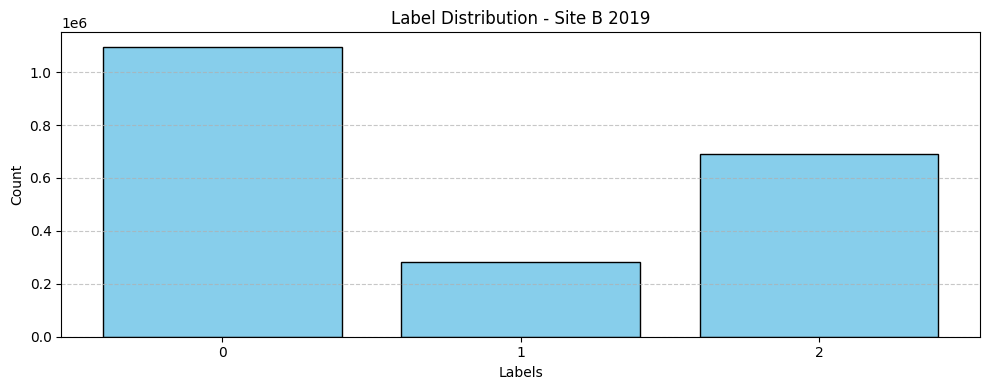

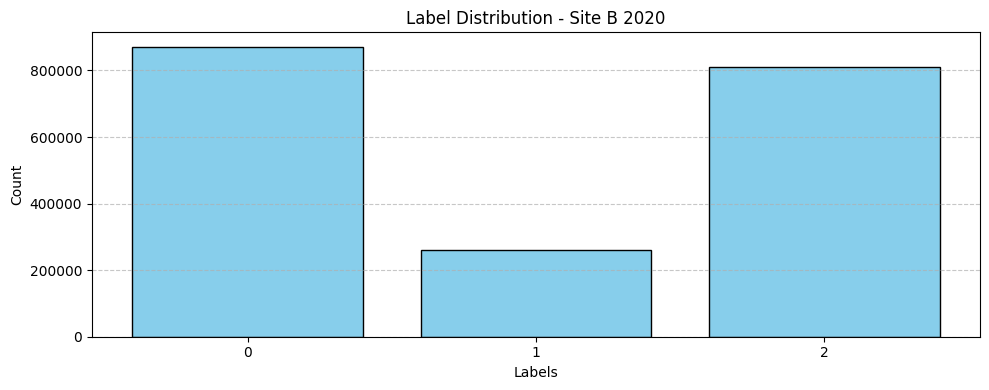

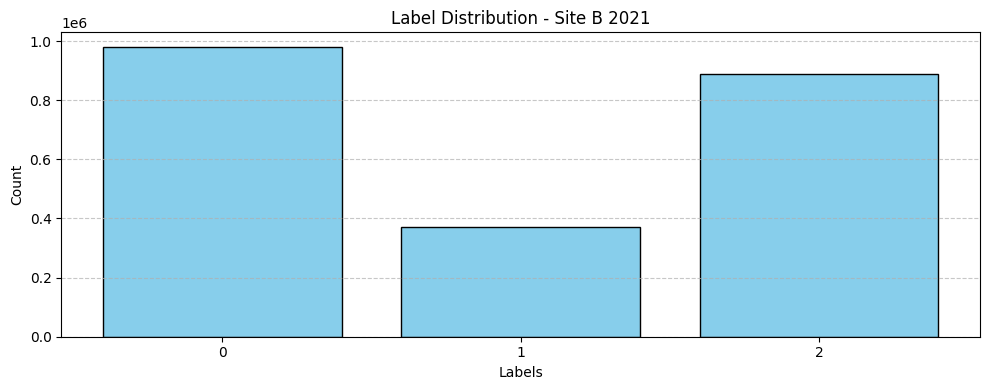

In [13]:
# Plot histogram
for year, y_label in SiteB_labels:
    unique_labels, counts = np.unique(y_label, return_counts=True)

    plt.figure(figsize=(10, 4))
    plt.bar(unique_labels.astype(str), counts, color='skyblue', edgecolor='black')
    plt.xlabel("Labels")
    plt.ylabel("Count")
    plt.title(f"Label Distribution - Site B {year}")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

-> Label distribution almost similar across the years but almost inverted (significant change) from Site A.

<hr>

## Site C (2019, 2020, 2021)

In [14]:
X_C_2019 = np.load('/kaggle/input/data-usa/Site_C/x-2019.npy')
X_C_2020 = np.load('/kaggle/input/data-usa/Site_C/x-2020.npy')
X_C_2021 = np.load('/kaggle/input/data-usa/Site_C/x-2021.npy')

print('Shape of X (Site C - 2019):', X_C_2019.shape)
print('Shape of X (Site C - 2020):', X_C_2020.shape)
print('Shape of X (Site C - 2021):', X_C_2021.shape)

SiteC_data = [
    ("2019", X_C_2019),
    ("2020", X_C_2020),
    ("2021", X_C_2021)
]

Shape of X (Site C - 2019): (2222642, 28, 6)
Shape of X (Site C - 2020): (2195695, 28, 6)
Shape of X (Site C - 2021): (2242176, 28, 6)


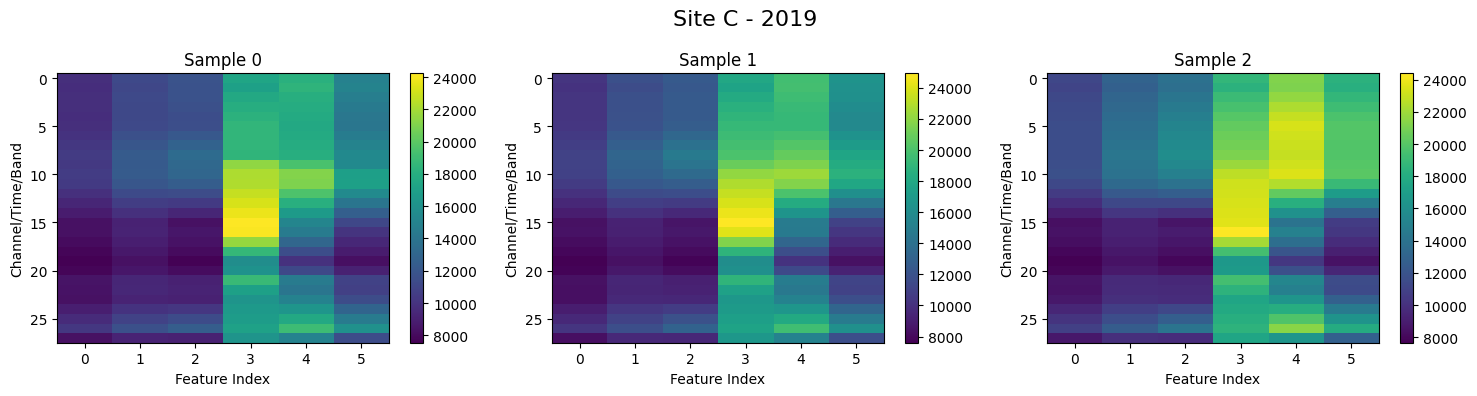

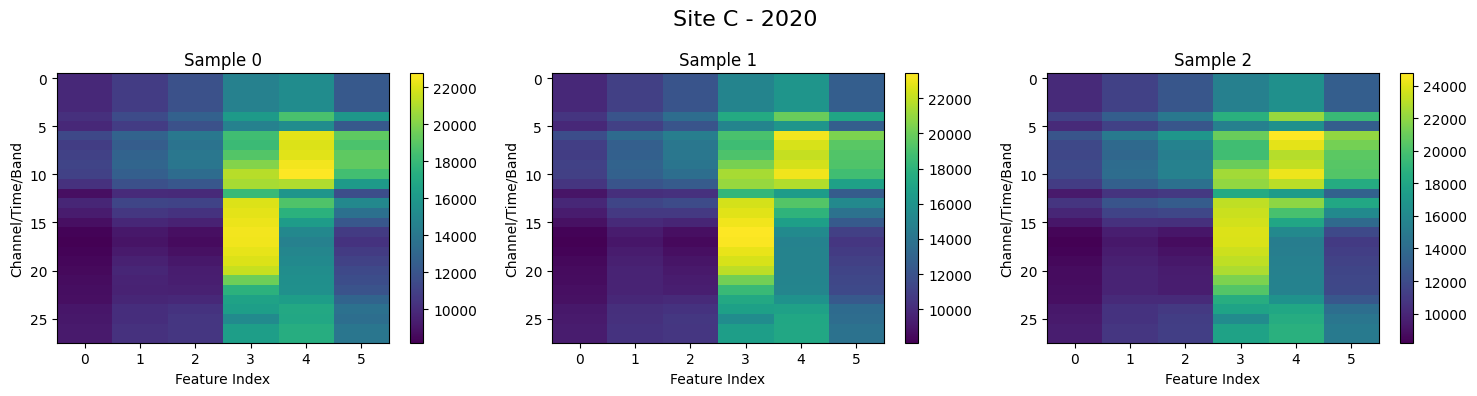

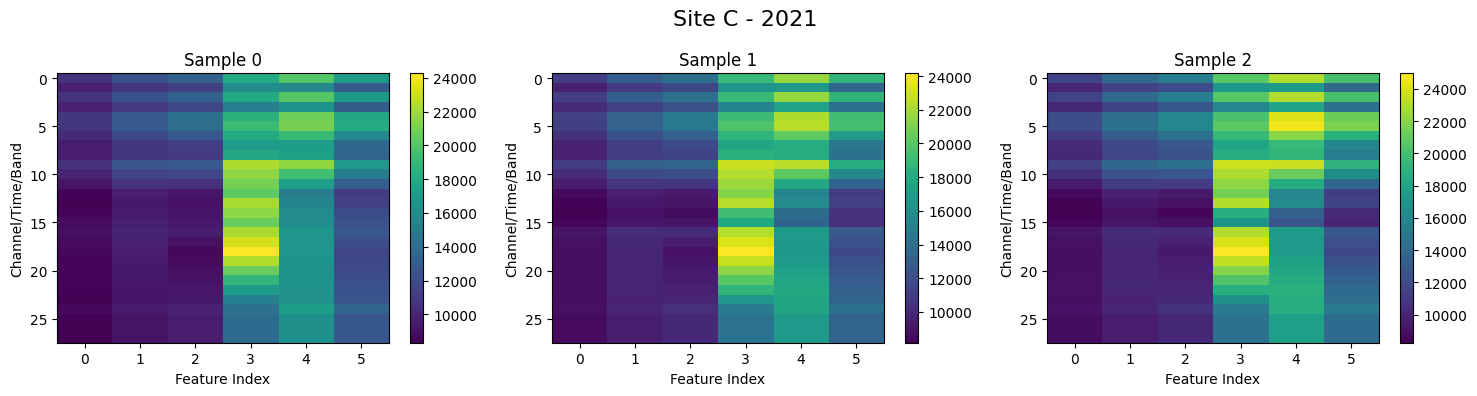

In [15]:
# Ploting the preprocessed feature maps for all three years of Site B
for year, X_data in SiteC_data:
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    for i in range(3):
        im = axes[i].imshow(X_data[i], aspect='auto', cmap='viridis')
        axes[i].set_title(f"Sample {i}")
        axes[i].set_xlabel("Feature Index")
        axes[i].set_ylabel("Channel/Time/Band")
        fig.colorbar(im, ax=axes[i], orientation='vertical')

    fig.suptitle(f"Site C - {year}", fontsize=16)
    plt.tight_layout()
    plt.show()

-> Input distribution changes slightly across years in Site C but very different from Site B and kind of similar to Site A.

In [16]:
for year, X_data in SiteC_data:
    print(f'\n\n======= For Site C - {year} =======')
    feature_means = X_data.mean(axis=(0, 1))  # average over samples and features
    feature_stds = X_data.std(axis=(0, 1))
    
    for i, (m, s) in enumerate(zip(feature_means, feature_stds)):
        print(f"Feature {i}: Mean = {m:.4f}, Std = {s:.4f}")
    
    # Compute overall mean and std
    mean = X_data.mean()
    std = X_data.std()
    
    print(f"\nGlobal Mean: {mean:.4f}")
    print(f"Global Std Dev: {std:.4f}")



======= For Site C - 2019 =======
Feature 0: Mean = 9433.3694, Std = 1282.0481
Feature 1: Mean = 10762.1018, Std = 1727.3354
Feature 2: Mean = 10940.1547, Std = 2491.9454
Feature 3: Mean = 18536.8519, Std = 3781.9056
Feature 4: Mean = 16040.1714, Std = 4158.0667
Feature 5: Mean = 12839.4798, Std = 3884.5165

Global Mean: 13092.0215
Global Std Dev: 4460.2926


======= For Site C - 2020 =======
Feature 0: Mean = 9503.2044, Std = 2700.5368
Feature 1: Mean = 10708.7751, Std = 2674.8102
Feature 2: Mean = 10754.3247, Std = 3078.8963
Feature 3: Mean = 19165.0872, Std = 4103.2602
Feature 4: Mean = 15513.0880, Std = 3639.9605
Feature 5: Mean = 12235.9111, Std = 3379.5891

Global Mean: 12980.0651
Global Std Dev: 4705.6792


======= For Site C - 2021 =======
Feature 0: Mean = 9535.8166, Std = 3084.4035
Feature 1: Mean = 10678.5843, Std = 2977.6013
Feature 2: Mean = 10704.5150, Std = 3321.3854
Feature 3: Mean = 19265.3258, Std = 4190.0847
Feature 4: Mean = 15453.4716, Std = 3517.5318
Feature 5: 

-> Values again are not normalized and features are on different scales across the years.

<hr>

In [17]:
y_C_2019 = np.load('/kaggle/input/data-usa/Site_C/y-2019.npy')
y_C_2020 = np.load('/kaggle/input/data-usa/Site_C/y-2020.npy')
y_C_2021 = np.load('/kaggle/input/data-usa/Site_C/y-2021.npy')

print('Shape of y (Site C - 2019):', y_C_2019.shape)
print('Shape of y (Site C - 2020):', y_C_2020.shape)
print('Shape of y (Site C - 2021):', y_C_2021.shape)

SiteC_labels = [
    ("2019", y_C_2019),
    ("2020", y_C_2020),
    ("2021", y_C_2021)

]

Shape of y (Site C - 2019): (2222642,)
Shape of y (Site C - 2020): (2195695,)
Shape of y (Site C - 2021): (2242176,)


In [18]:
for year, y_label in SiteC_labels:
    unique_labels, counts = np.unique(y_label, return_counts=True)
    total = counts.sum()
    print(f'\n\n ====== Site C - {year} ======')
    print(f"{'Label':<10}{'Count':<10}{'Percentage':<10}")
    print("-" * 30)
    for label, count in zip(unique_labels, counts):
        percentage = (count / total) * 100
        print(f"{label:<10}{count:<10}{percentage:<.2f}%")
    
    print(f"\nTotal samples: {total}")



 ====== Site C - 2019 ======
Label     Count     Percentage
------------------------------
0         1363284   61.34%
1         281869    12.68%
2         577489    25.98%

Total samples: 2222642


 ====== Site C - 2020 ======
Label     Count     Percentage
------------------------------
0         1149383   52.35%
1         227351    10.35%
2         818961    37.30%

Total samples: 2195695


 ====== Site C - 2021 ======
Label     Count     Percentage
------------------------------
0         896726    39.99%
1         299398    13.35%
2         1046052   46.65%

Total samples: 2242176


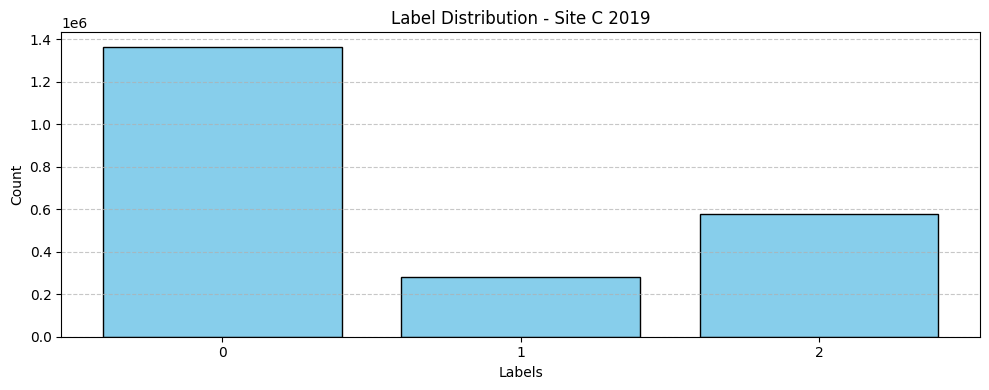

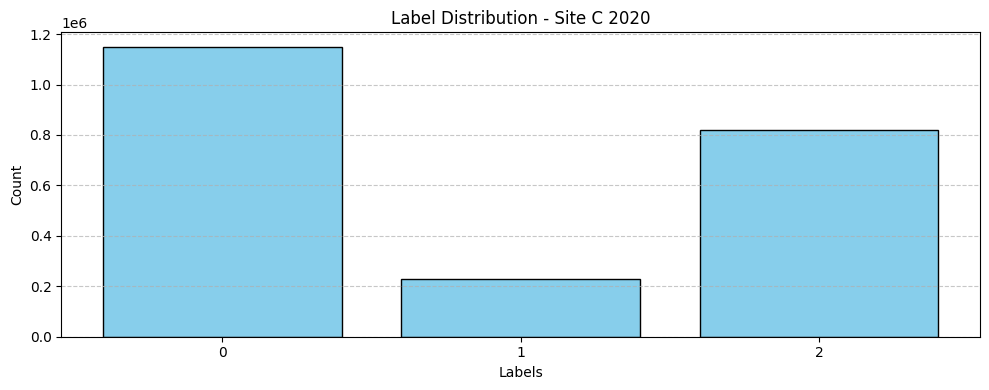

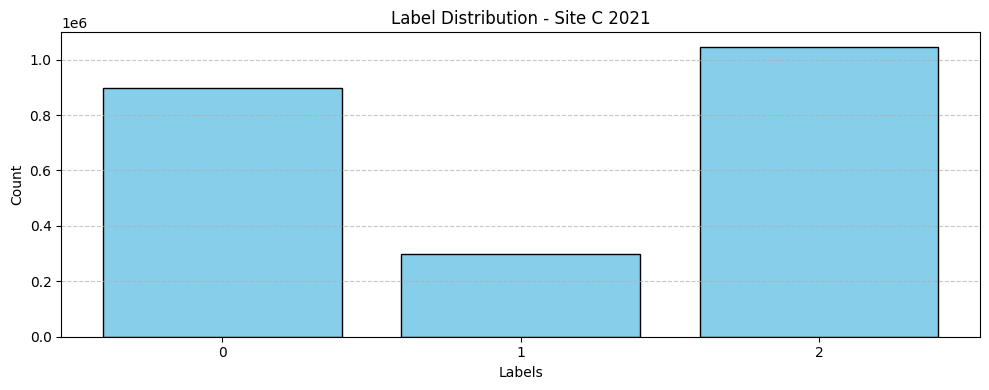

In [19]:
# Plot histogram
for year, y_label in SiteC_labels:
    unique_labels, counts = np.unique(y_label, return_counts=True)

    plt.figure(figsize=(10, 4))
    plt.bar(unique_labels.astype(str), counts, color='skyblue', edgecolor='black')
    plt.xlabel("Labels")
    plt.ylabel("Count")
    plt.title(f"Label Distribution - Site C {year}")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

-> Label distribution changes across the years the most in Site C. Similar distribtuion to Site B but kind of inverted (significant change) as compared to Site A.

<hr>